# FoodHub Data Analysis


### Problem Statement / Business Objective
The food aggregator company aims to analyze data related to orders made on their online platform to gain insights into customer behavior and restaurant performance. the objective is to conduct data analysis to address key questions and provide actionable insights to improve business operations.

### Data Description
The dataset comprises various attributes related to food orders. A detailed data dictionary is provided below:

#### Data Dictionary:
- order_id: Unique identifier for each order.
- customer_id: ID of the customer who placed the order.
- restaurant_name: Name of the restaurant fulfilling the order.
- cuisine_type: Type of cuisine ordered by the customer.
- cost: Total cost of the order.
- day_of_the_week: Indicates whether the order was placed on a weekday or weekend (Monday to Friday considered weekdays, Saturday and Sunday considered weekends).
- rating: Customer's rating of the order out of 5.
- food_preparation_time: Time taken by the restaurant to prepare the food (in minutes), calculated from order confirmation to delivery person's pick-up confirmation.
- delivery_time: Time taken by the delivery person to deliver the food package (in minutes), calculated from pick-up confirmation to drop-off confirmation.

### Processes
1. **Data Gathering**: Collect relevant data related to food orders from the company's online portal.
2. **Data Importation**: Import the collected data into a suitable data analysis environment.
3. **Data cleaning**: Clean and preprocess the data to ensure accuracy and consistency.
4. **Feature Engineering**: Extract meaningful features from the data to facilitate analysis.
5. **Descriptive and Prescriptive Analysis (Exploratory Data Analysis)**: Explore the data to identify patterns, trends, and potential areas for improvement.
6. **Conclusions and Recommendations**: Summarize findings from the analysis and provide actionable recommendations for business enhancement based on the insights gained.

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3CF6-C7AB

 Directory of C:\Users\agnes\OneDrive\Documents\GIZ Women in AI\Assignments

05/13/2024  08:43 PM    <DIR>          .
05/13/2024  08:43 PM    <DIR>          ..
05/13/2024  08:11 PM    <DIR>          .ipynb_checkpoints
05/13/2024  08:43 PM           621,960 FoodHub Data_Analysis.ipynb
03/21/2024  11:09 AM           123,933 foodhub_order.csv
03/30/2024  01:20 AM           282,810 Joelle Afi - Exercise melanoma data analysis.ipynb
04/02/2024  01:47 PM           689,686 Joelle's Copy Mid-Course Project (Data Analysis Project).ipynb
04/03/2024  08:56 AM        35,502,620 Joelles Excel Assignment.xlsx
03/27/2024  02:15 PM             5,127 melanoma.csv
04/11/2024  06:52 PM            12,962 Mid-Course Project (Data Analysis Project).ipynb
03/25/2024  09:42 AM        12,033,474 superstore data.csv
04/04/2024  05:04 PM         7,426,125 The_OISP_Campaign_Group3.pptx
               9 File(s)     56,698,697 bytes
              

### Data  Gathering

The data was collected from the food hub website. 
It contains variables on restuarants who are signed up on the platform

### Import your data

In [3]:
foodhub=pd.read_csv("foodhub_order.csv")

### Data Cleaning

sanity checks

In [5]:
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
foodhub.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [7]:
foodhub.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [3]:
foodhub.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [9]:
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observation

The rating column is categorical and this might affect the analysis so it must be changed into an int. The "Not given" values
also needs to be changed to a nan or a 0

In [10]:
not_given=(foodhub=="Not given").sum()

In [11]:
not_given

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

### Observation

A total number of seven hundred and thirty six (736) customers did not give rating. This will eventually affect the 
quality of the anlysis since they form a significance part of the total number of clients

In [13]:
foodhub['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

In [68]:
foodhub.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time_spent
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,68.000000


In [23]:
foodhub.describe(include='object')

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


#### Observation

The description on the categorical values above shows that Shake Shack is highly patronised compared to other restuarnats.
The cuisine type most customers go on for is the American cuisine. Purchases are usually higher on the weekend as compared to the weekday

### Rated and unrated orders?

In [64]:
# Write the code here.
#Feel free to add more cells.
not_given=(foodhub["rating"]=="Not given").sum()

In [65]:
print(f'The number of orders not rated are: {not_given}')

The number of orders not rated are: 736


## Exploratory Data Analysis (EDA)

### Univariate Analysis

###  This section explores all the variables and provide observations on their distributions.

#### Resturant

In [12]:
len(foodhub["restaurant_name"].value_counts().unique())
foodhub["restaurant_name"].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

The data contains a total of 35 restuarants signed up. 

#### order_id

In [85]:
foodhub["order_id"].nunique()

1898

In [13]:
(foodhub["customer_id"].value_counts()>= 5).value_counts()

count
False    1167
True       33
Name: count, dtype: int64

#### Observation
Among the customers in the dataset, 33 customers have placed at least 5 orders, while 1167 customers have placed fewer than 5 orders.

#### Customer id

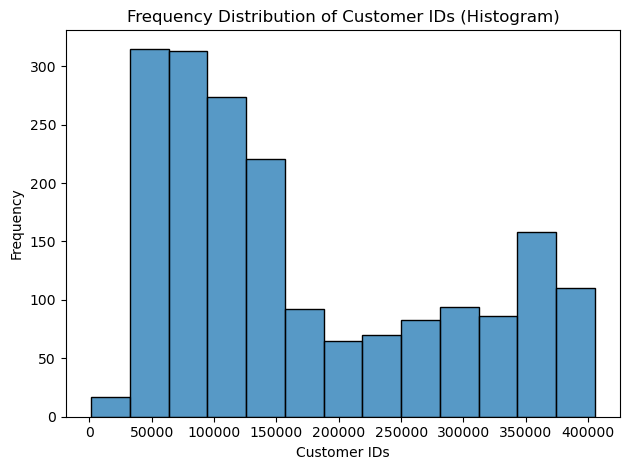

In [15]:
# Calculate the count of each customer ID
id_counts = foodhub["customer_id"].value_counts()

# Plotting
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig, ax = plt.subplots()
# Histogram
sns.histplot(data=foodhub, x="customer_id")
ax.set_xlabel("Customer IDs")
ax.set_ylabel("Frequency")
ax.set_title("Frequency Distribution of Customer IDs (Histogram)")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

This gives us an insight into the trend of costumer ordering behavior

#### cuisine_type

In [14]:
c=round(foodhub["cuisine_type"].value_counts(normalize=True)*100, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

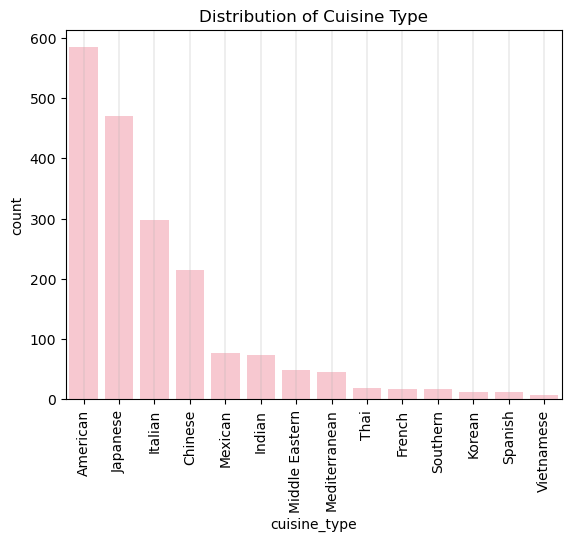

In [15]:
sns.countplot(x=foodhub["cuisine_type"], order=c.index, color="pink")
plt.title("Distribution of Cuisine Type")
plt.grid(axis="x", linewidth=0.3)
plt.xticks(rotation=90)
plt.show




The American cuisine is the most popular

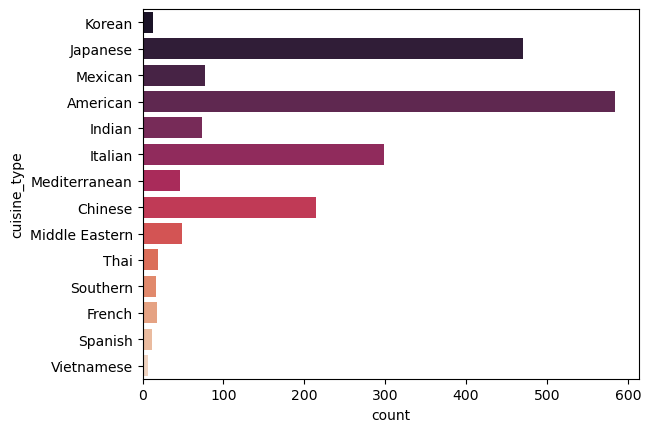

In [36]:
sns.countplot(y=foodhub["cuisine_type"], palette="rocket")
plt.show()

### Observation
The american Cuisine type has the highest distribution followed by Japanese and Italian. The least is Vietnamese

#### Cost of the Order

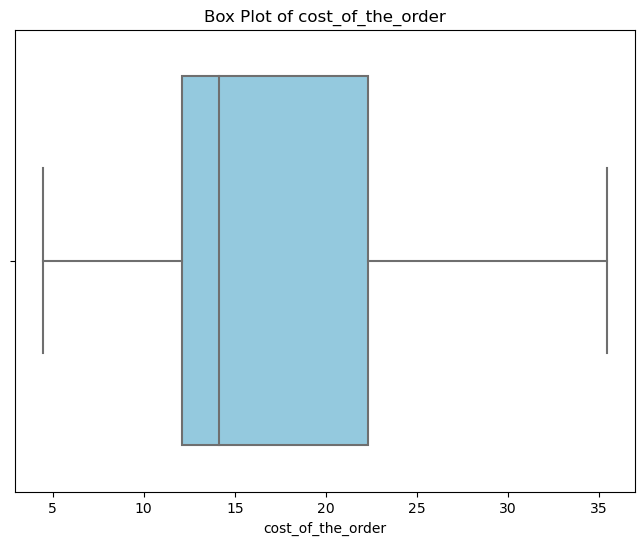

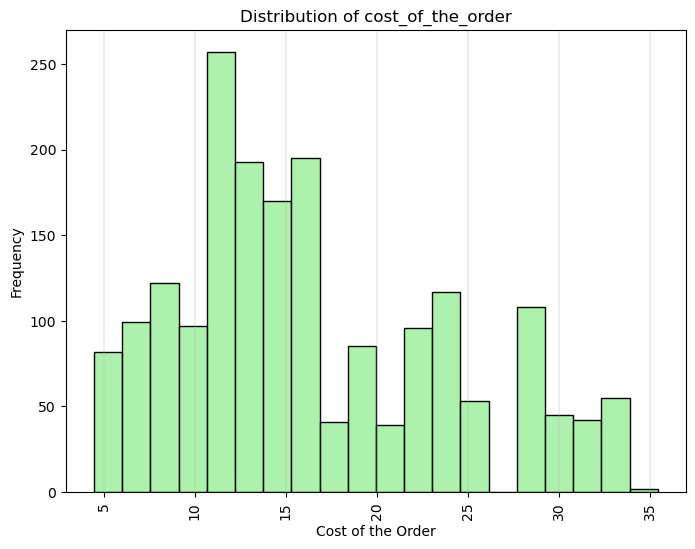

In [216]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=foodhub["cost_of_the_order"], color='skyblue')
plt.title("Box Plot of cost_of_the_order")
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(x=foodhub["cost_of_the_order"], bins=20, color='lightgreen')
plt.title("Distribution of cost_of_the_order")
plt.xlabel("Cost of the Order")
plt.ylabel("Frequency")
plt.grid(axis="x", linewidth=0.3)
plt.xticks(rotation=90)
plt.show()



### Observation
The majority of cuisine types fall within the price range of 11 dollars to 16 dollars, indicating that this range has the highest distribution in terms of the cost of the order.

#### Day of the week

<function matplotlib.pyplot.show(close=None, block=None)>

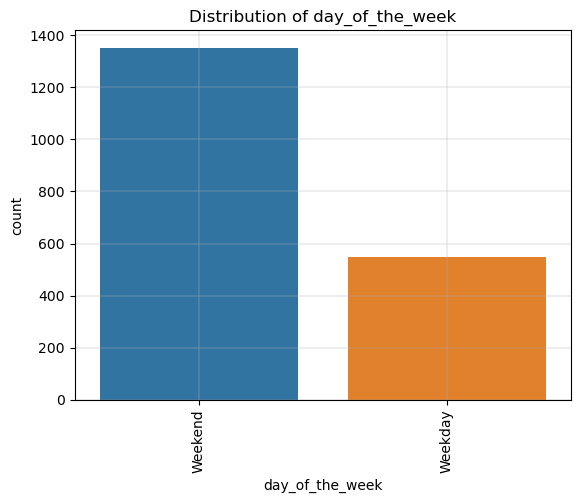

In [203]:
foodhub["day_of_the_week"].value_counts()
sns.countplot(x=foodhub["day_of_the_week"])
plt.title("Distribution of day_of_the_week")
plt.grid(axis="both", linewidth=0.3)
plt.xticks(rotation=90)
plt.show

### Observation

This visualisation is shows that orders on weekends are relatively higher as compared to the weekday

#### Rating

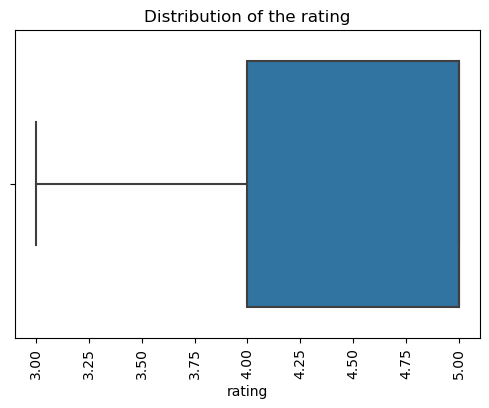

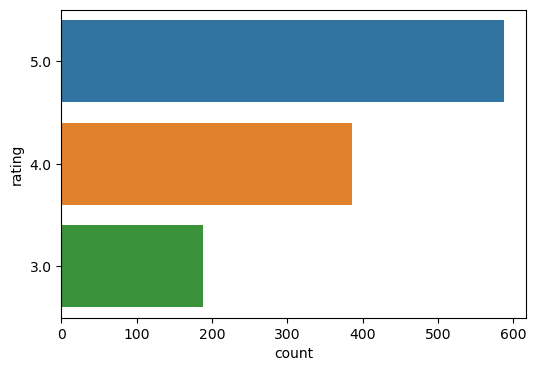

<function matplotlib.pyplot.show(close=None, block=None)>

In [219]:
#Boxplot
plt.figure(figsize=(6, 4))
foodhub["rating"].value_counts()
foodhub["rating"].value_counts()
sns.boxplot(x=foodhub["rating"])
plt.title("Distribution of the rating")

plt.xticks(rotation=90)

#countplot
plt.figure(figsize=(6, 4))

order = foodhub["rating"].value_counts().index

# Plot the countplot
sns.countplot(y=foodhub["rating"], order=order)
plt.show()


### Observation
The average rating falls between 4.5 to 5, suggesting that most customers had minimal to no complaints about the services provided.

#### food_preparation_time

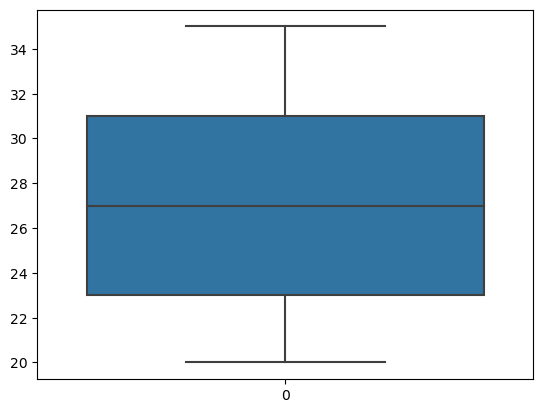

In [34]:
sns.boxplot(foodhub["food_preparation_time"])
plt.show()

#### Observation
The preparation time for the majority of cuisines averages around 27 minutes. However, there are some cuisines that have longer waiting times, up to 60 minutes, while others have shorter waiting times, as low as 20 minutes.

#### Delivery_time

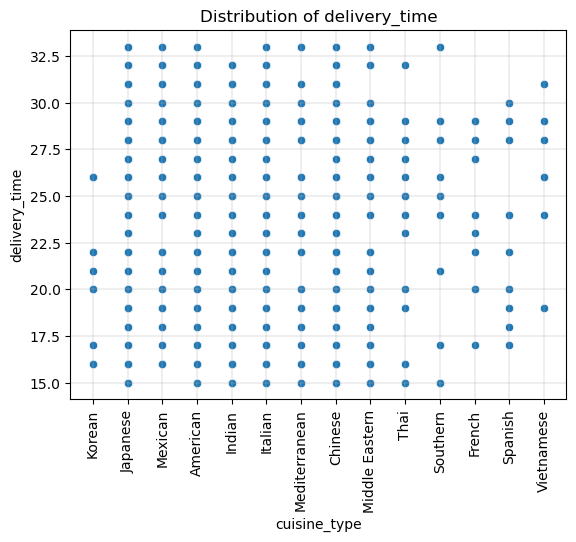

In [223]:
sns.scatterplot(x=foodhub["cuisine_type"], y=foodhub["delivery_time"])
plt.title("Distribution of delivery_time")
plt.grid(axis="both", linewidth=0.3)
plt.xticks(rotation=90)


plt.show()

### The top 5 restaurants based on orders

In [160]:
top_5=foodhub.groupby("restaurant_name")[["order_id"]].count().sort_values(by="order_id", ascending=False)

top_5.head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


The top five(5) restuarants in terms of orders received are Shake Shack,The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm with a total order of 219, 132, 119, 96 and 68 respectively

### The most popular cuisine on weekends

In [248]:
grouped=foodhub.groupby(["day_of_the_week", "cuisine_type"])[["order_id"]] .count()

day=grouped.sort_values(by="day_of_the_week", ascending=False)

day.idxmax()


order_id    (Weekend, American)
dtype: object

#### Observation
The most popular cuisine on weekend is **Americain cuisine**

### Orders costing more than 20 dollars?

In [3]:
# Write the code here
# Feel free to add more cells

In [231]:
the_percentage=foodhub[foodhub["cost_of_the_order"]>20]
total_data=foodhub["cost_of_the_order"].shape[0]
percentage = round((the_percentage.shape[0] / total_data) * 100, 2)

print(f'The percentage of the orders costing more than $20 is: {percentage}%')

The percentage of the orders costing more than $20 is: 29.24%


#### Observation
29.24% of the orders cost more than $20 is: 

### **Question 6**: What is the mean order delivery time?

In [4]:
# Write the code here
# Feel free to add more cells

In [234]:
foodhub["delivery_time"]=time=foodhub['delivery_time'].astype(int)
mean=round(foodhub["delivery_time"].mean(), 2)
print(f'The mean order delivery time is {mean} minutes')

The mean order delivery time is 24.16 minutes


### The top 3 most frequent customers.

In [5]:
# Write the code here
# Feel free to add more cells

In [235]:
top_customers=foodhub[["customer_id"]].value_counts()
top3 = top_customers.sort_values(ascending=False).head(3)

print(f'The top most frequent customers are {top3}')

The top most frequent customers are customer_id
52832          13
47440          10
83287           9
Name: count, dtype: int64


#### Observation
The top three (3) customers are 52832 ,47440, 83287 with a number of orders of 13, 10, and 9 respectively

## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


In [62]:
# Write the code here
# Feel free to add more cells

### RELATIONSHIP BETWEEN CUISINE TYPE AND RATING

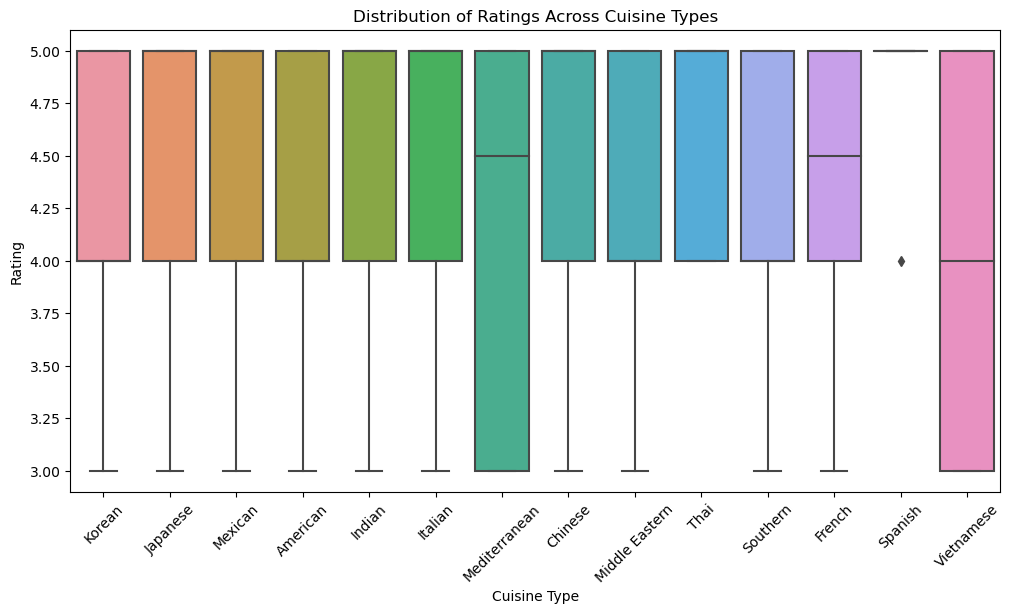

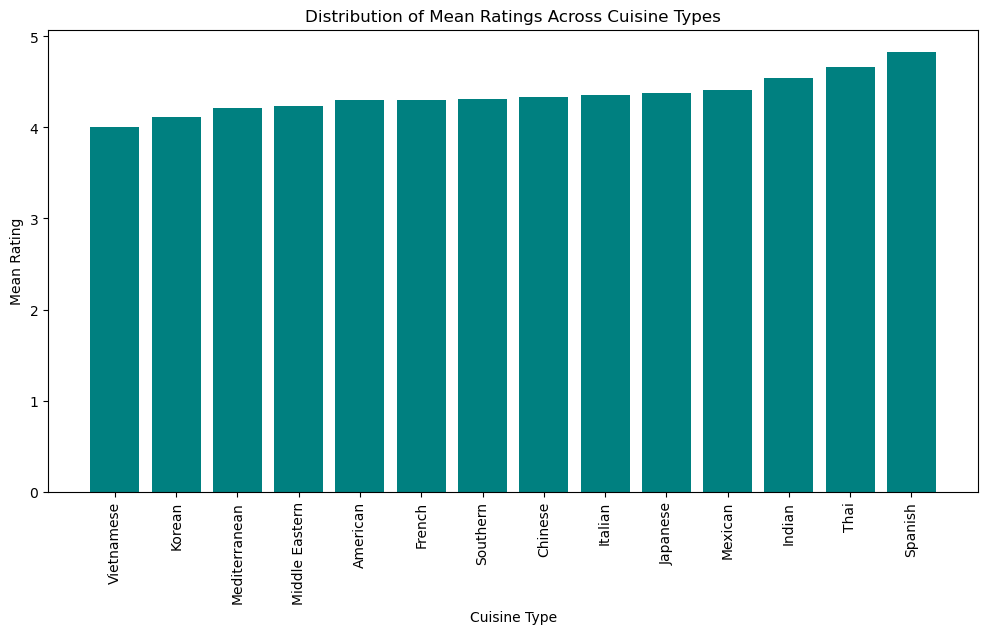

In [237]:
foodhub['rating'] = foodhub['rating'].replace('Not given', np.nan)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='rating', data=foodhub)
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.title('Distribution of Ratings Across Cuisine Types')
plt.show()


foodhub['rating'] = foodhub['rating'].replace('Not given', np.nan)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figsize for better visualization

# Calculate the mean rating for each cuisine type
mean_ratings = foodhub.groupby("cuisine_type")["rating"].mean().reset_index()

sorted_values=mean_ratings.sort_values(by="rating", ascending=True)

# Plot the bar chart
ax.bar(x=sorted_values["cuisine_type"], height=sorted_values["rating"], color='teal')

ax.set_xlabel("Cuisine Type")
ax.set_ylabel("Mean Rating")
ax.set_title("Distribution of Mean Ratings Across Cuisine Types")
plt.xticks(rotation=90)
plt.show()

## Cost of order and Cuisine Type

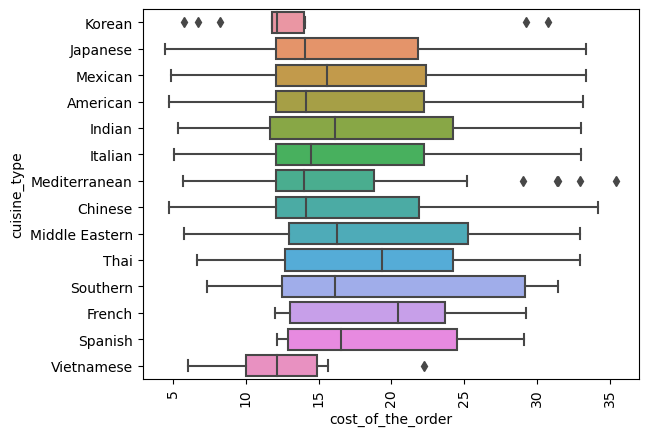

In [42]:
sns.boxplot(data=foodhub, x='cost_of_the_order', y='cuisine_type')
plt.xticks(rotation=90)

# Calculate mean and median
mean_val = foodhub['cost_of_the_order'].mean()
median_val = foodhub['cost_of_the_order'].median()

# Add mean and median lines
plt.axhline(mean_val, color='r', linestyle='--', label='Mean')
plt.axhline(median_val, color='g', linestyle='-', label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

### RELATIONSHIP BETWEEN RATING AND TOTAL TIME SPENT TO RECIEVE MEAL

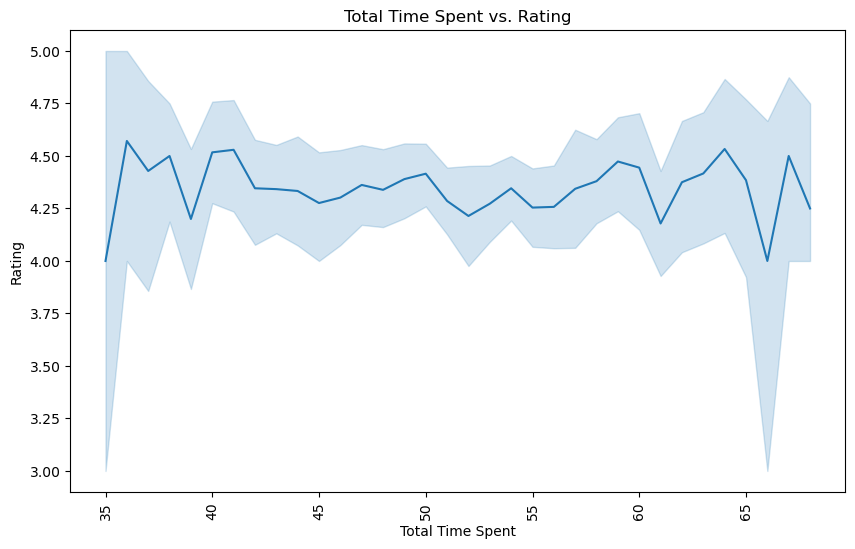

In [23]:
foodhub["new_rating"]=foodhub["rating"].replace("Not given", np.nan)
rating_float=foodhub["rating"]=foodhub["new_rating"].astype(float)
total_time_spent= foodhub["food_preparation_time"]+foodhub["delivery_time"]

# sns.scatterplot(x=rating_float, y=total_time_spent, data=foodhub)
# plt.show()


plt.figure(figsize=(10, 6))
#sns.barplot(x=total_time_spent, y=foodhub["rating"], errorbar=None)
sns.lineplot(x=total_time_spent, y=foodhub["new_rating"])
plt.xlabel("Total Time Spent")
plt.ylabel("Rating")
plt.title("Total Time Spent vs. Rating")
plt.xticks(rotation=90)
plt.show()

#### Observation
This suggests that the ratings given were not influenced by the time it took to deliver the food to customers.

### Day of the week, cost of order and food preparation

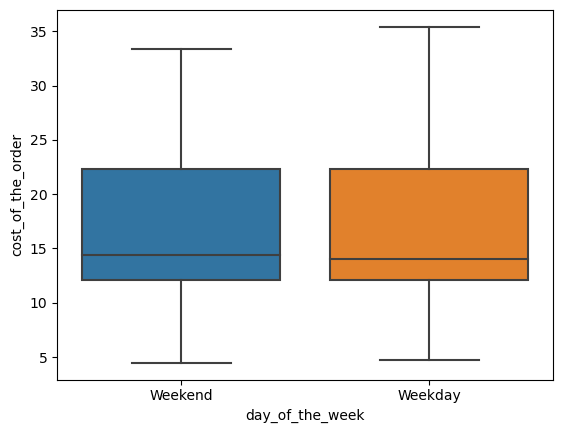

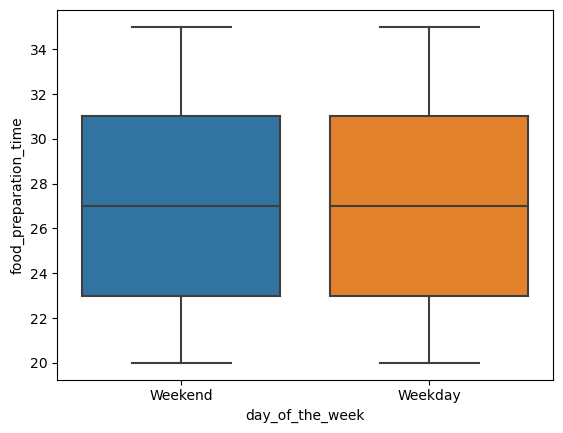

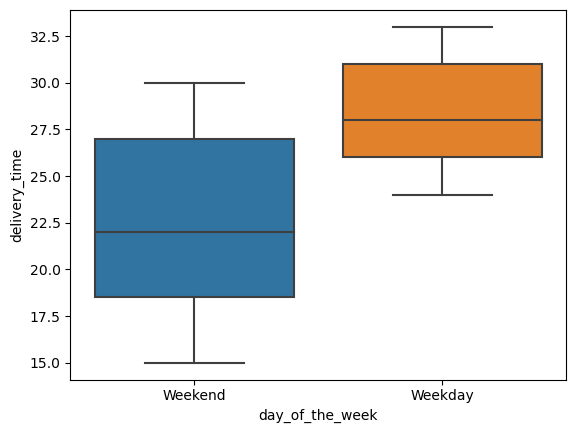

In [38]:
sns.boxplot(data=foodhub,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=foodhub,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=foodhub,x='day_of_the_week',y='delivery_time') 
plt.show()

#### Observation
The day of the week does not impact the cost of the order or the time it takes to prepare the food. 
However, it's noticeable that delivery times are generally faster on weekends compared to weekdays. 
This can likely be attributed to heavier traffic typically experienced during weekdays.

### Bivariate Analysis


### Relationship between rating and total time spent to receive meal.

Relationship between cuisine type, average price and quantity demanded.(Multivariate)

### Relationship between cuisine type and rating

Relationship between cuisine type, restaurant name and order id.

Relationship between the day of the week and cuisine type (Bivariate)

C:\Users\agnes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

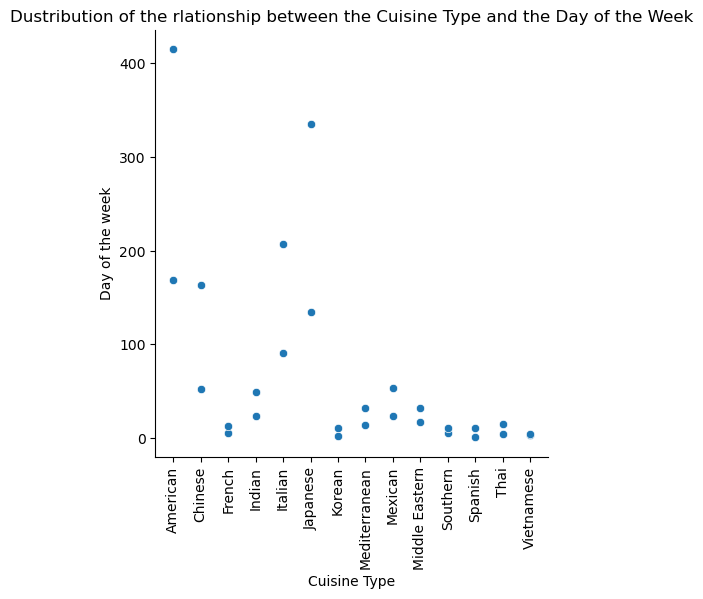

In [18]:
# cuisine_counts=foodhub["cuisine_type"].value_counts()
cuisine_counts=foodhub.groupby(["day_of_the_week", "cuisine_type"])[["order_id"]].count()


plt.figure(figsize=(10, 6))

sns.relplot(x="cuisine_type", y="order_id" , data= cuisine_counts, kind="scatter")
plt.xlabel("Cuisine Type")
plt.ylabel("Day of the week")
plt.title("Dustribution of the relationship between the Cuisine Type and the Day of the Week")
plt.xticks(rotation=90)
plt.show()





###  The restaurants likely to get a promotional offer based on ratings.

In [24]:
count=foodhub.groupby("restaurant_name")['new_rating'].count()

more_fifty=count[count>50].index

more_fifty

restos=foodhub[foodhub['restaurant_name'].isin(more_fifty)]

mean_ratings= restos.groupby('restaurant_name')['new_rating'].mean()
selected_restos=mean_ratings[mean_ratings > 4]
print(selected_restos)

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: new_rating, dtype: float64


### Observation
The restaurants fulfilling the criteria to get the promotional offer are as follows:

**restaurant_name**

Blue Ribbon Fried Chicken    4.328125


Blue Ribbon Sushi            4.219178

Shake Shack                  4.278195

The Meatball Shop            4.511905

Name: new_rating, dtype: float64

### The net revenue generated by the company across all orders based on 25% on orders greater 20 USD and 15% on 5 USD.

In [ ]:
# Write the code here
# Feel free to add more cells

In [26]:
# costoforder=foodhub.groupby("restaurant_name")["cost_of_the_order"].max()

first_revenue=((foodhub["cost_of_the_order"]>20)*0.25).sum()

second_revenue=((foodhub["cost_of_the_order"]>5)&(foodhub["cost_of_the_order"]<=20)*0.15).sum()

total_revenue= round((first_revenue + second_revenue),2)

print(f'The total revenue generated is:\n ${total_revenue}')

The total revenue generated is:
 $1472.75


#### Observation
The net revenue generated by the company across all orders based on 25% on orders greater 20 USD and 15% on 5 USD is **$1472.75**

### The percentage of orders thatt takes more than 60mins to deliver the food. 

In [ ]:
# Write the code here
# Feel free to add more cells

In [50]:
foodhub["total_time_spent"]= foodhub["food_preparation_time"]+foodhub["delivery_time"]

more_time=(foodhub["total_time_spent"]>60).sum()
more_time

percent_of_order=round((more_time/foodhub["order_id"].count())*100,2)


print(f'{percent_of_order}% of the orders takes more than 60 minutes to deliver food')



10.54% of the orders takes more than 60 minutes to deliver food


#### Observation
The percentage of orders thatt takes more than 60 mins to deliver the food is 10.54%`

### Analyzing the delivery time during weekends and weekdays

In [ ]:
# Write the code here
# Feel free to add more cells

In [263]:
avr_del_time = foodhub.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time


delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

The analysis reveals that the mean delivery time on weekends is notably shorter, averaging at 22.47 minutes, compared to the weekday delivery time, which stands at 28.34 minutes which suggests that there are fewer orders during weekdays in comparison to weekends.

## Conclusion and Recommendations

### Conclusions:

**Rating Distribution**: While most ratings are high, it's notable that a significant portion of orders (38%) remain unrated, suggesting that a large proportion of customers do not provide feedback. This could impact the restaurant's ability to accurately gauge customer satisfaction and make informed improvements.

**Cuisine Popularity**: The popularity of cuisines remains consistent regardless of the day of the week, indicating consistent customer preferences over time. However, demand is higher on weekends, reflecting increased consumer activity during leisure periods.

**Preparation Time**: Preparation time for orders is relatively consistent across cuisines, suggesting efficient kitchen operations. However, delivery time varies more significantly, potentially influenced by factors such as distance, day of the week, or external factors like traffic congestion.

**Delivery Time Variability**: The variability in delivery time may impact customer satisfaction and perception of service quality. Customers may expect more predictable delivery times, especially during peak hours or on busy days.



### Recommendations:

**Encourage Feedback**: Implement strategies to encourage customers to provide feedback, such as offering incentives, simplifying the rating process, or soliciting feedback through follow-up communications. This can help capture a more comprehensive understanding of customer experiences and identify areas for improvement.

**Optimize Weekend Operations**: Recognizing the higher demand on weekends, allocate additional resources, such as staffing and inventory, to ensure smooth operations and timely order fulfillment. Consider implementing pre-ordering options or extended operating hours to accommodate peak demand periods.

**Improve Delivery Time Estimation**: Enhance delivery time estimation accuracy by incorporating factors such as distance, traffic patterns, and historical data into delivery planning algorithms. Communicate transparently with customers regarding expected delivery times to manage expectations effectively.

**Streamline Delivery Logistics**: Invest in technology and logistics infrastructure to optimize delivery routes, minimize transit times, and improve overall delivery efficiency. This may involve leveraging route optimization software, GPS tracking systems, and real-time traffic data to streamline delivery operations.

**Enhance Customer Communication**: Keep customers informed throughout the delivery process by providing real-time updates on order status, estimated delivery times, and any potential delays. Proactive communication can mitigate dissatisfaction and enhance overall customer experience.

---